# Week 5 handin

## 01 Assignment
## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
All Mandatory tasks ar done

## 03 Solution

In [96]:
# 1 https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2020K4
import pandas as pd 
fcsv = 'data/FOLK1A-Fraskilt-2008-2020.csv'
df = pd.read_csv(fcsv, sep=';')

data_1 = df.iloc[0,2]
data_2 = df.iloc[1,2]
diff = round(data_1 / data_2 * 100, 2)

print("2008: {data_1}\n2020: {data_2}\nDiff: {diff}%".format(data_1 = data_1, data_2 = data_2, diff = diff))

2008: 428864
2020: 552419
Diff: 77.63%


In [97]:
# 2 https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K4&OMR%C3%85DE=101%2C851%2C751%2C630%2C461
import pandas as pd

fscv = 'data/FOLK1A-Ugift-Storby-2020.csv'
df = pd.read_csv(fscv, sep=';')
df = df.sort_values(by = "OMRÅDE")

collected_data = []

for index in range(0, len(df.index), 2):
    place = df.iloc[index, 1]
    population = df.iloc[index, 3]
    unmarried = df.iloc[index + 1, 3]
    unmarried_pct = round(unmarried / population * 100, 2)
    
    data = {"Place": place, "Population": population, "Unmarried": unmarried, "Percentage": unmarried_pct}
    collected_data.append(data)
    
collected_data = sorted(collected_data, key = lambda x: x["Percentage"], reverse = True)
print(collected_data[0])

{'Place': 'København', 'Population': 637936, 'Unmarried': 417782, 'Percentage': 65.49}


Text(0, 0.5, 'Antal gifte')

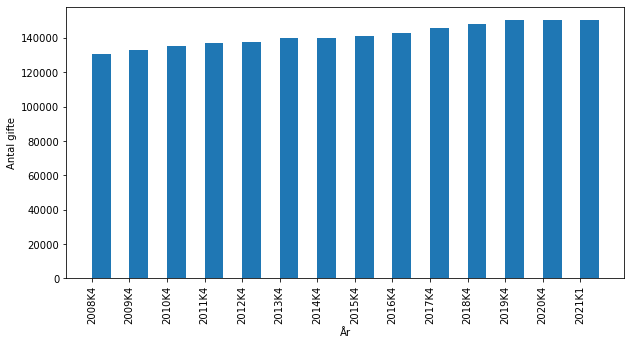

In [103]:
# 3 https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K4%2C2021K1
import pandas as pd
import matplotlib.pyplot as plt

fscv = 'data/FOLK1A-Marrital-Status-KBH.csv'
df = pd.read_csv(fscv, sep=';')

data = {}

for index in range(0, len(df.index)):
    data[df.iloc[index, 2]] = df.iloc[index, 3]
    
plt.figure(figsize=[10, 5])    
plt.bar(data.keys(), data.values(), width = 0.5, align = "edge")
plt.xticks(rotation = 90)
plt.xlabel("År", fontsize = 10)
plt.ylabel("Antal gifte", fontsize = 10)

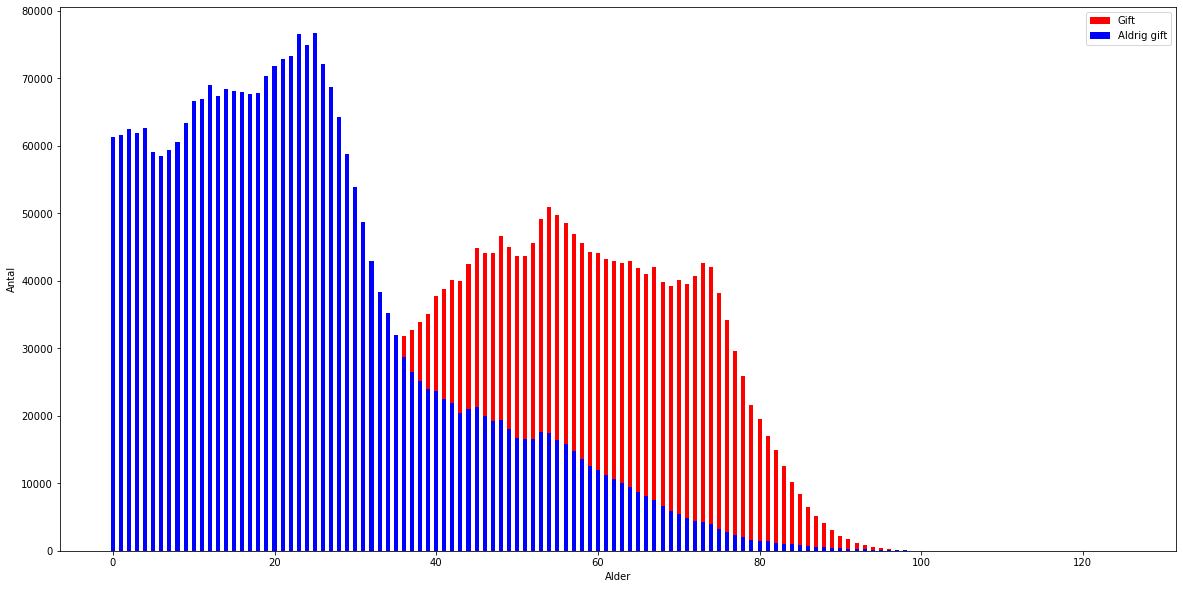

In [99]:
# 4 https://api.statbank.dk/v1/data/FOLK1A/CSV?timeOrder=Ascending&delimiter=Semicolon&CIVILSTAND=U%2CG&ALDER=*&Tid=2020K4
import pandas as pd
import matplotlib.pyplot as plt

fscv = 'data/FOLK1A-Married-Unmarried-2020.csv'
df = pd.read_csv(fscv, sep=';')

max_age = 125
no_married_per_age = {}
no_never_married_per_age = {}

for index in range(1, max_age + 2):
        age = index - 1
        never_married = df.iloc[index, 3]
        married = df.iloc[index + max_age + 2, 3]
        
        no_married_per_age[age] = married
        no_never_married_per_age[age] = never_married
        
ages = list(no_married_per_age.keys())
married_per_age = list(no_married_per_age.values())
never_married_per_age = list(no_never_married_per_age.values())

plt.figure(figsize=[20, 10])
plt.xlabel("Alder", fontsize = 10)
plt.ylabel("Antal", fontsize = 10)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
    
plt_married = plt.bar(ages, married_per_age, width = 0.5, linewidth = 0, align = "center", color = "red")
plt_never_married = plt.bar(ages, never_married_per_age, width = 0.5, linewidth = 0, align = "center", color = "blue")
    
plt.legend([plt_married, plt_never_married], ["Gift", "Aldrig gift"], loc = 1)